In [2]:
import glob
import os
import pathlib
import subprocess

import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor, as_completed

import numpy as np
from schicluster.cool.contact_distance import compute_decay, contact_distance
from gliderport.preset.notebook import notebook_snakemake

In [3]:
data_dir = '/data/female-amb/female-m3c-rmbkl/'
ref_dir = "/data/aging/ref/m3C"

In [4]:
_dir = '/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact'

## pre contact_table

In [3]:
all_pool_paths = glob.glob(f'{data_dir}/*')

In [4]:
meta = pd.read_csv('/data/metadata/m3C_META_230814.csv', index_col = 0)

In [10]:
for pool_path in glob.glob(f'{data_dir}/*'):
    pool_name = pathlib.Path(pool_path).name
    all_hic_files = glob.glob(f'{pool_path}/*')
    cell_id_list = [pathlib.Path(path).name.split('.')[0] for path in all_hic_files]
    tmpdf = pd.DataFrame({'cell_id':cell_id_list,'hic_paths':all_hic_files})
    shared_cells = list(set(meta.index) & set(tmpdf['cell_id'])) 
    # tmpdf = tmpdf[tmpdf['cell_id'].isin(shared_cells)]
    # print(f'{pool_name} has {tmpdf.shape[0]} nuclei')
    tmpdf.to_csv(f'contact_table/{pool_name}.contact_table_rmbkl.tsv', sep = '\t', header = None, index = None)


pool_amb58 has 2902 nuclei
pool_amb60 has 2805 nuclei
pool_amb65 has 2751 nuclei


In [3]:
cell_table_path = f"{_dir}/contact_table_rmbkl.tsv"
chrom_size_path = f"{ref_dir}/mm10.main.nochrM.nochrY.chrom.sizes"

## regnerate non-complete

In [ ]:
all_pool_paths = glob.glob(f'{_dir}/*')
all_pool_paths

['/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact/pool_amb65',
 '/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact/Snakefile',
 '/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact/pool_amb58',
 '/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact/notebooks',
 '/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact/Snakemake.success',
 '/home/qzeng_salk_edu/project/230816_m3C_basic_analysis/00.filter-contact/filter_contact/pool_amb60']

In [11]:
for pool_path in all_pool_paths:
    pool_name = pathlib.Path(pool_path).name
    if pool_name in ['pool_amb58','pool_amb60','pool_amb65']:
        all_hic_files = glob.glob(f'{pool_path}/*/*/*')
        cell_id_list = [pathlib.Path(path).name.split('.')[0] for path in all_hic_files]
        tmpdf = pd.DataFrame({'cell_id':cell_id_list,'hic_paths':all_hic_files})
        tmpdf.to_csv(f'contact_table/{pool_name}.contact_table_rmbkl.tsv', sep = '\t', header = None, index = None)

## pre snakemake

In [4]:
groups = [pathlib.Path(pool_path).name for pool_path in glob.glob(f'{data_dir}/*')]
len(groups)

29

In [8]:
notebook_snakemake(work_dir = 'gen_contact_decay', 
                   notebook_dir = 'template', 
                   groups = groups, 
                   group_files=None, 
                   default_cpu=20, 
                   default_mem_gb=20, 
                   redo_prepare=False)

In [ ]:
#this step is very fast

In [4]:
decay = pd.read_hdf("contact_distance_decay.hdf5", key="data")
decay.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
AMB_220712_18mo_12D_13B_2_P4-1-I15-K1,0,1,0,0,0,0,0,2,984,1252,...,1793,1656,1047,827,776,376,240,92,28,1
AMB_220712_18mo_12D_13B_2_P4-1-I15-D13,0,0,0,0,0,0,1,3,907,1234,...,1720,1427,1376,766,443,394,374,139,57,48
AMB_220712_18mo_12D_13B_2_P4-1-I15-E13,0,0,0,0,0,1,0,1,927,1222,...,2147,2048,1592,985,734,394,351,286,132,25
AMB_220712_18mo_12D_13B_2_P4-1-I15-F13,1,0,0,0,0,0,0,0,1197,1503,...,1814,1557,1146,973,602,395,286,70,25,15
AMB_220712_18mo_12D_13B_2_P4-1-I15-K13,0,0,0,0,1,0,1,0,1005,1274,...,1129,1058,858,600,331,391,178,68,63,8


In [6]:
sparsity = pd.read_hdf("contact_distance_chromsparsity.hdf5")
sparsity.head()

,chr1,chr2,chr3,chr5,chrX,chr4,chr6,chr10,chr13,chr11,chr7,chr12,chr14,chr8,chr9,chr16,chr15,chr17,chr18,chr19
AMB_220712_18mo_12D_13B_2_P4-1-I15-K1,17268,16424,12531,12289,12001,12744,13018,10417,9742,10054,11477,9198,9104,10179,11539,7489,7586,7501,6266,4313
AMB_220712_18mo_12D_13B_2_P4-1-I15-D13,15765,13761,11724,10694,11138,12458,11303,9599,8679,10798,10197,7883,7483,9885,10608,6053,6897,6777,7123,3488
AMB_220712_18mo_12D_13B_2_P4-1-I15-E13,12755,14006,9072,13508,11305,9001,8634,9783,8564,9530,11630,8160,9351,9755,10314,6888,7807,7197,4946,4353
AMB_220712_18mo_12D_13B_2_P4-1-I15-F13,19056,18320,14686,14656,13075,14744,14754,11417,10842,11397,12973,11429,10102,12097,12370,8842,8924,8621,8207,4935
AMB_220712_18mo_12D_13B_2_P4-1-I15-K13,16378,15901,12590,13767,10505,12788,13136,11996,9927,11401,11360,9755,8732,11216,10683,8150,7766,7543,7273,4705


In [14]:
data = decay / decay.sum(axis=1)[:, None]
ratio = data.iloc[:, 50:70].sum(axis=1) / data.iloc[:, 90:110].sum(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


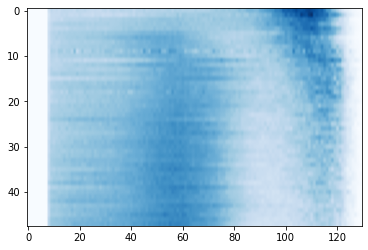

In [15]:
fig, ax = plt.subplots()
ax.imshow(data.iloc[ratio.argsort()], aspect="auto", cmap="Blues")